<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/PCAejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1 Cargar los datos y librerias**

In [9]:
#!pip install plotly
!pip install chart-studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df.tail()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Dividir los datos en 2 partes

In [5]:

# Se divide la matriz del dataset en dos partes
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas
X = df.iloc[:,0:4].values


print("caracteristicas")
print(X[0:12])

# El vector y contiene los valores de la 4 columna (especie)para todas las filas
y = df.iloc[:,4].values

print("variable objetivo")
print(y[0:12])




caracteristicas
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]
variable objetivo
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa']


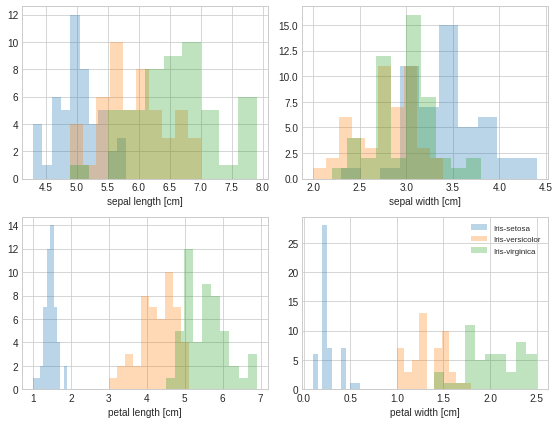

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()


## **2 Normalizar**



In [17]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(X_std[0:12])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]
 [-0.53717756  1.49486315 -1.2844067  -1.31297673]
 [-1.26418478  0.80065426 -1.227541   -1.31297673]]


## **3 Calcular Autovalores y Autovectores**

Matriz de covarianza

In [18]:
cov_mat = np.cov(X_std.T)
print('NumPy matriz de covarianza: \n%s' %cov_mat)

NumPy matriz de covarianza: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Calculamos los Autovalores y autovectores de la matriz de covarianza

In [19]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Autovectores \n%s' %eig_vecs)
print('\n Autovalores \n%s' %eig_vals)

Autovectores 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Autovalores 
[2.93035378 0.92740362 0.14834223 0.02074601]


Singular Vector Descomposition (computacionalmente mas eficiente)

In [45]:
u,s,v = np.linalg.svd(X_std.T)

print(u)
print(s)


[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[20.89551896 11.75513248  4.7013819   1.75816839]


[8.95785778 4.44486039]
[-2.2224302   4.47892889]
[0.89578578 0.44448604]
[-0.44448604  0.89578578]


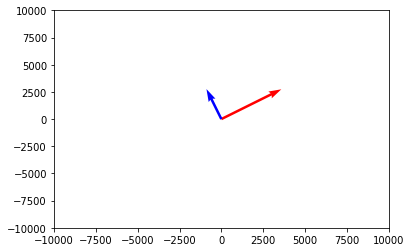

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import linalg as LA

# Assume that I loaded 'N' no of 2d points from a file and used
# np.cov() to find the below covariance matrix

# This is my covariance matrix obtained from 2 x N points
cov_mat = [[3407.3108669,  1473.06388943],
           [1473.06388943, 1169.53151003]]

eigen_values, eigen_vectors = LA.eig(cov_mat)

#print(eigen_values)

origin = [0, 0]
eigVa1=10
eigVa2=5
eig_vec1 = eigen_vectors[:,0]
eig_vec2 = eigen_vectors[:,1]

print(eig_vec1*eigVa1)
print(eig_vec2*eigVa2)
print(eig_vec1)
print(eig_vec2)


# This line below plots the 2d points
#plt.scatter(np_array[:,0], np_array[:,1])

plt.quiver(*origin, *eig_vec1*eigVa1, color=['r'], scale=50)
plt.quiver(*origin, *eig_vec2*eigVa2, color=['b'], scale=50)
#plt.autoscale(enable=True, axis='both', tight=None)
plt.xlim(-10000, 10000)
plt.ylim(-10000, 10000)
plt.show()

Ordenamos los autovalores de mayor a menor

In [0]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas en orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])



Autovalores en orden descendiente:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


## **4 Seleccionar los autovectores correspondientes a las componentes principales**

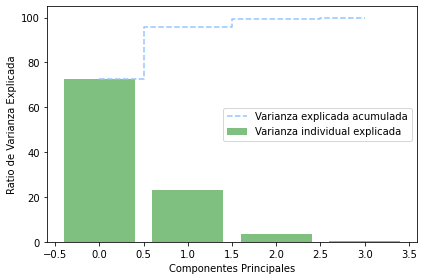

In [0]:
# los componentes selecionados dependeran de cuantas dimensiones deseamos reducir

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

## 5 Proyectar 

Proyectar el dataset original sobre el nuevo espacio de dimensión menor al espacio original 

In [0]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


Proyectar el dataset original sobre el nuevo espacio de dimensión menor al espacio original 

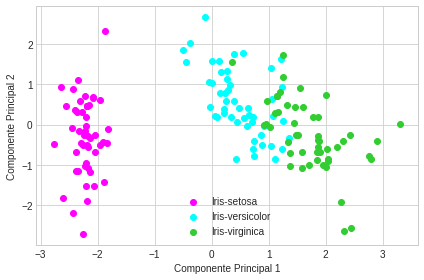

In [0]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
